<a href="https://colab.research.google.com/github/Siddharth0317/osl/blob/main/Exp_3_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

print("x_train.shape:", x_train.shape)
print("x_test.shape:", x_test.shape)
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)


In [ ]:
# Convert labels from 2D → 1D
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)
print("y_train[:5]:", y_train[:5])


In [ ]:
classes = ["airplane","automobile","bird","cat","deer",
           "dog","frog","horse","ship","truck"]

def plot_sample(x, y, index):
    plt.figure(figsize=(2,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])
    plt.show()

# Example
plot_sample(x_train, y_train, 0)


In [ ]:
# Normalize pixel values between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

print("x_train[0]:\n", x_train[0])


In [ ]:
annmodel = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(1000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

annmodel.compile(optimizer='SGD',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

history_ann = annmodel.fit(x_train, y_train, epochs=5)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.2973 - loss: 1.9477
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 33ms/step - accuracy: 0.4077 - loss: 1.6756
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.4384 - loss: 1.5763
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.4656 - loss: 1.5147
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.4860 - loss: 1.4570


In [ ]:
annmodel.evaluate(x_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4624 - loss: 1.5231


[1.525607705116272, 0.45249998569488525]

In [ ]:
cnnmodel = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnnmodel.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

history = cnnmodel.fit(x_train, y_train, epochs=10,
                       validation_data=(x_test, y_test))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 47ms/step - accuracy: 0.3488 - loss: 1.7539 - val_accuracy: 0.5319 - val_loss: 1.3061
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.5688 - loss: 1.2071 - val_accuracy: 0.6231 - val_loss: 1.0851
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.6402 - loss: 1.0253 - val_accuracy: 0.6566 - val_loss: 0.9786
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.6788 - loss: 0.9104 - val_accuracy: 0.6723 - val_loss: 0.9374
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 49ms/step - accuracy: 0.7067 - loss: 0.8259 - val_accuracy: 0.6809 - val_loss: 0.9262
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 46ms/step - accuracy: 0.7324 - loss: 0.7628 - val_accuracy: 0.6858 - val_loss: 0.9056
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.7485 - loss: 0.7129 - val_accuracy: 0.7103 - val_loss: 0.8462
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.7649 -

In [ ]:
cnnmodel.evaluate(x_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7059 - loss: 0.8657


[0.8695157170295715, 0.7064999938011169]

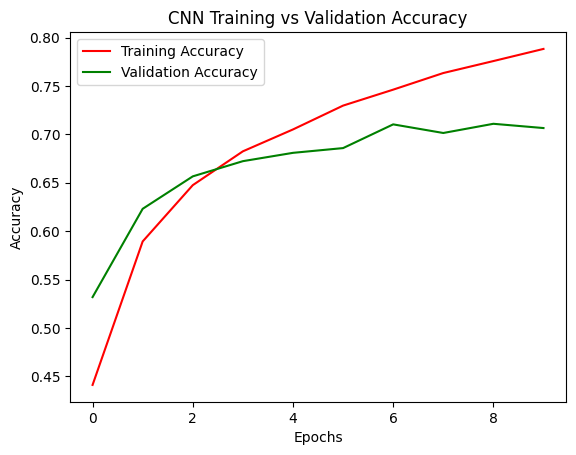

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy', color='red')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN Training vs Validation Accuracy')
plt.show()


In [ ]:
y_pred = cnnmodel.predict(x_test)
y_pred[:5]


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


array([[8.0071832e-04, 8.3398778e-04, 9.3612476e-04, 9.6463609e-01,
        9.0841539e-05, 9.9101989e-03, 1.3221999e-03, 2.6768242e-04,
        2.0783521e-02, 4.1850956e-04],
       [3.7418839e-02, 6.0176786e-02, 6.1433752e-06, 6.7111496e-06,
        2.2251263e-07, 2.3838481e-08, 1.5117672e-08, 3.0606415e-08,
        8.9793348e-01, 4.4577606e-03],
       [9.1592647e-02, 4.0755895e-01, 3.5809835e-03, 7.9807332e-03,
        3.1260550e-03, 1.3635653e-03, 2.2817908e-03, 1.7399696e-03,
        3.7460947e-01, 1.0616581e-01],
       [9.6466267e-01, 2.5410045e-04, 1.7696794e-04, 2.1160724e-04,
        1.6976508e-03, 2.8752905e-04, 2.2193976e-06, 7.2242583e-05,
        3.1549048e-02, 1.0858340e-03],
       [2.3483315e-05, 2.2668757e-04, 3.1372417e-02, 5.3710833e-02,
        5.3609788e-01, 1.7687738e-03, 3.7660468e-01, 3.3012016e-06,
        9.4535746e-05, 9.7289703e-05]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
print("Predicted classes for first 5:", y_classes[:5])
print("Actual classes:", y_test[:5])


Predicted classes for first 5: [np.int64(3), np.int64(8), np.int64(1), np.int64(0), np.int64(4)]
Actual classes: [3 8 8 0 6]


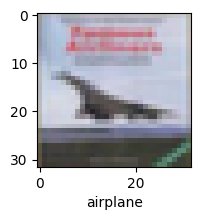

Predicted label: airplane
Actual label: airplane


In [ ]:
index = 3
plot_sample(x_test, y_test, index)
print("Predicted label:", classes[y_classes[index]])
print("Actual label:", classes[y_test[index]])


In [ ]:
cnnmodel.save('cnnmodel.keras')
print(" Model saved as cnnmodel.keras (recommended format)")



✅ Model saved as cnnmodel.keras (recommended format)
